In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

In [3]:
pdata = pd.read_csv("backpain.csv")

In [7]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Status',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['Status']   # Predicted class (1=True, 0=False) (1 X m)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
67,75.649731,19.339799,64.148685,56.309932,95.903629,69.551303,0.687092,24.1004,13.3444,15.75602,-0.550516,18.2915
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0.732730,33.7477,7.5426,15.74090,-6.421289,11.9857
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,0.099941,20.2822,10.3082,15.89258,-14.156070,39.9730
34,59.595540,31.998244,46.560252,27.597296,119.330354,1.474286,0.477088,8.6051,8.3058,8.53700,-0.029028,40.5823
197,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,0.751482,12.6576,15.9381,15.23920,-15.444826,7.2157


AttributeError: 'Series' object has no attribute 'train'

In [20]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [21]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.7741935483870968


In [22]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [23]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [24]:
# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

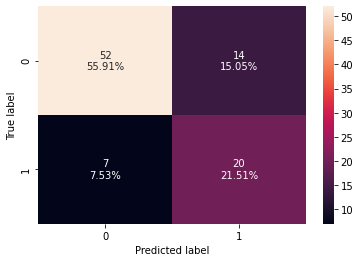

In [27]:
confusion_matrix_sklearn(model, X_test, y_test)

In [31]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                               Imp
degree_spondylolisthesis  0.412395
pelvic tilt               0.118683
pelvic_radius             0.111555
sacral_slope              0.104975
Direct_tilt               0.058833
cervical_tilt             0.058276
scoliosis_slope           0.041630
thoracic_slope            0.038605
sacrum_angle              0.030965
pelvic_slope              0.013762
pelvic_incidence          0.010322
lumbar_lordosis_angle     0.000000


In [33]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state=1)
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

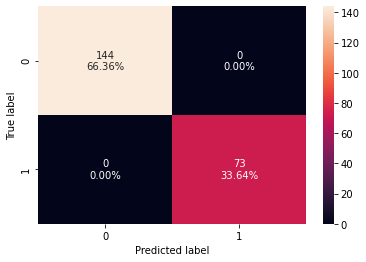

In [36]:
confusion_matrix_sklearn(model, X_train, y_train)

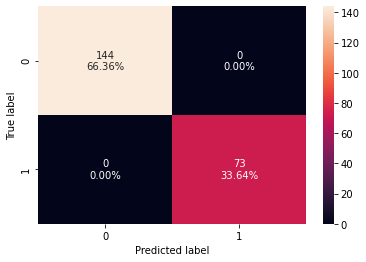

In [35]:
confusion_matrix_sklearn(model2, X_train, y_train)